In [15]:
import pandas as pd
import numpy as np
import os

import plotly.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
import plotly.graph_objs as go

from matplotlib import pyplot as plt
import seaborn as sns

init_notebook_mode(connected=True)

%matplotlib inline

# Data

In [16]:
cluster_df = pd.read_csv('/home/local/X5/stanislav.streltsov/projects/hack/dataframe_for_category_clusters.csv')

In [17]:
cluster_df.category_clusters.value_counts()

0    6550
1      70
2      13
Name: category_clusters, dtype: int64

# Vis

In [18]:
cluster_df.head()

Unnamed: 0   cid  category_clusters  action_add-favs  action_add-cart  \
0           0  2171                  0              0.0              3.0   
1           1  2410                  0              0.0              0.0   
2           2  2818                  0              0.0              0.0   
3           3  3579                  0              0.0              0.0   
4           4  4907                  0              0.0              0.0   

   action_view  action_purchase  
0         43.0              5.0  
1          5.0              0.0  
2          1.0              0.0  
3          2.0              0.0  
4          3.0              0.0

In [19]:
data1 = []
for cluster, cluster_group in cluster_df.groupby(['category_clusters']):
    x = cluster_group['action_add-favs']
    y = cluster_group['action_add-cart']
    z = cluster_group['action_view']
    trace = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=6,
            line=dict(
                width=0.5
            ),
            opacity=0.8
        ),
#         name="Wine type %.d" % cluster
    )
    data1.append(trace)
    
layout = go.Layout(
#     width = 750,
    height = 800,
#     title='Кластеризация',
    scene = dict(
                    xaxis = dict(
                        title='1'),
                    yaxis = dict(
                        title='2'),
                    zaxis = dict(
                        title='3'),),
    legend = dict(x = 0.8, y = 0.5),
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     ),
    annotations=[
        dict(
            x=0.5,
            y=0.9,
#             text='Wine Classification',
            showarrow=False,
            font=dict(
                size=22,
            )
        ),
        dict(
            x=0.5,
            y=0.85,
#             text='Wine types by top-3 classifier features',
            showarrow=False,
#             font=dict(
#                 size=22,
#             )
        )
    ]
)

fig = go.Figure(data=data1, layout=layout)
iplot(fig, filename='basic-line')

In [2]:
data_path = '/mnt/small/DATA/mel/mck/ae_mk_hack_2019_data/'

In [3]:
files = os.listdir(data_path)
files[0]

'ae_mk_hack_2019_data_6.csv'

In [4]:
df = pd.DataFrame()
for file in files:
    df = df.append(pd.read_csv(data_path + file, header=-1, names = ['uid', 'iid', 'cid', 'action', 'ts']), sort = False)

In [5]:
df.head(1)

uid      iid      cid    action          ts
0  217655  3201817  4217906  purchase  1512301075

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100013598 entries, 0 to 10001359
Data columns (total 5 columns):
uid       int64
iid       int64
cid       int64
action    object
ts        int64
dtypes: int64(4), object(1)
memory usage: 4.5+ GB


In [7]:
df.head()

uid      iid      cid    action          ts
0  217655  3201817  4217906  purchase  1512301075
1  217655  3122798  2920476      view  1512301114
2  217655  1650608  3002561  purchase  1512301179
3  217655  3122798  2920476  purchase  1512301687
4  217655   157599  4801426      view  1512312910

In [8]:
df.tail()

uid      iid      cid action          ts
10001355  330936  2708872  4048584   view  1511687265
10001356  330936  3087961  1349561   view  1511687414
10001357  330936  2248082  1349561   view  1511687491
10001358  330936  4651915  1349561   view  1511687607
10001359  330936  1093896  1349561   view  1511687695

In [9]:
df.iid.nunique()

4159841

In [10]:
df[df.action == 'purchase'].uid.nunique()

671479

In [11]:
df.uid.nunique()

986657

In [13]:
df[df.action == 'view'].shape[0]

89593055

In [14]:
df[df.action == 'purchase'].shape[0]

2013048

# Filtr

In [15]:
import tqdm

In [16]:
df = df[df.ts > 0]
sigma3max = df.ts.mean() + df.ts.std() * 2
sigma3min = df.ts.mean() - df.ts.std() * 2
df = df[df.ts < sigma3max]
df = df[df.ts > sigma3min]

In [17]:
df = df[df.ts > 0]
sigma3max = df.ts.mean() + df.ts.std() * 2
sigma3min = df.ts.mean() - df.ts.std() * 2
df = df[df.ts < sigma3max]
df = df[df.ts > sigma3min]

In [18]:
sigma3min, sigma3max

(1511500010.2963924, 1512422088.4017534)

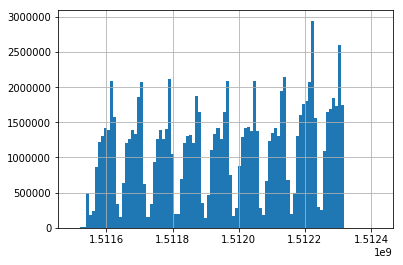

In [19]:
df.ts.hist(bins = 100)

In [20]:
df['ts_repr'] = pd.to_datetime(df['ts'], unit='s', origin='unix')

In [21]:
df.head()

uid      iid      cid    action          ts             ts_repr
0  217655  3201817  4217906  purchase  1512301075 2017-12-03 11:37:55
1  217655  3122798  2920476      view  1512301114 2017-12-03 11:38:34
2  217655  1650608  3002561  purchase  1512301179 2017-12-03 11:39:39
3  217655  3122798  2920476  purchase  1512301687 2017-12-03 11:48:07
4  217655   157599  4801426      view  1512312910 2017-12-03 14:55:10

In [22]:
df.ts_repr.min()

Timestamp('2017-11-24 05:07:00')

In [23]:
df.ts_repr.max()

Timestamp('2017-12-04 20:49:27')

# Explore

In [24]:
df.sort_values(['uid', 'ts'], inplace=True)
df.reset_index(inplace = True, drop = True)

In [25]:
df.head(1)

uid      iid      cid action          ts             ts_repr
0    1  2268318  2520377   view  1511544070 2017-11-24 17:21:10

In [26]:
df.head()

uid      iid      cid action          ts             ts_repr
0    1  2268318  2520377   view  1511544070 2017-11-24 17:21:10
1    1  2333346  2520771   view  1511561733 2017-11-24 22:15:33
2    1  2576651   149192   view  1511572885 2017-11-25 01:21:25
3    1  3830808  4181361   view  1511593493 2017-11-25 07:04:53
4    1  4365585  2520377   view  1511596146 2017-11-25 07:49:06

In [27]:
df['ts_shift'] = df['ts'].shift(1)
df['ts_dif'] = (df['ts'] - df['ts_shift']) / 60 / 60
df['same_sess'] = df['ts_dif'] < 0.5
df['same_sess'] =1 - df['same_sess']
df['sessia'] = df.same_sess.cumsum()
df = df[df['ts_dif'] > 0]

In [24]:
# for i, group in tqdm.tqdm(df.groupby(['iid']), total = df['uid'].nunique()):
#     group['ts_shift'] = group['ts'].shift(1)
#     group['ts_dif'] = (group['ts'] - group['ts_shift']) / 60 / 60
#     group['same_sess'] = group['ts_dif'] < 0.5
#     group['same_sess'] =1 - group['same_sess']
#     df.loc[group.index, 'sassia'] = group.same_sess.cumsum()

# Features

In [28]:
import random

In [30]:
uid_sample = random.sample(list(df.uid.unique()), 25000)
dfs = df[df.uid.isin(uid_sample)].copy()

In [32]:
dfs.reset_index(inplace=True, drop = True)

In [33]:
split_date = dfs.ts.max() - int((dfs.ts.max() - dfs.ts.min()) * 0.2)

In [34]:
df.uid.nunique()

986569

In [39]:
# train_dfs = dfs[:int(dfs.shape[0] / 2)].copy()
# test_dfs = dfs.copy()

train_dfs = dfs[dfs.ts < split_date].copy()
test_dfs = dfs.copy()

In [40]:
test_dfs.shape

(2499659, 10)

In [41]:
train_dfs.shape

(1828916, 10)

In [42]:
dfs['uid'].unique()

array([     11,      23,      42, ..., 1017769, 1017804, 1017852])

In [43]:
df['action'].unique()

array(['view', 'add-favs', 'purchase', 'add-cart'], dtype=object)

In [29]:
# group = dfs[dfs.uid == 70].copy()
# group['sessia_count'] = group['sessia'].nunique() # кол-во сессий
# group['ts_range'] = (group['ts'].max() - group['ts'].min()) / 60 / 60 # сколько провел на сайте в часах
# group['view_freq'] = group[group.action == 'view'].shape[0] / group.shape[0]
# group['purch_freq'] = group[group.action == 'purchase'].shape[0] / group.shape[0] # сколько купил за все время в %
# group['fav_freq'] = group[group.action == 'add-favs'].shape[0] / group.shape[0]
# group['cart_freq'] = group[group.action == 'add-cart'].shape[0] / group.shape[0]

# # mean time to buy
# tb = []
# for i, row in group[group.action == 'purchase'].iterrows():
#     tb.append(row['ts'] - group[group.iid == row['iid']].ts.values[0])
# group['time_to_buy'] = np.mean(tb)

# # mean time between purchases
# i = group[group.action == 'purchase'].copy()
# i['shift_p_ts'] = i['ts'].shift()
# group['mean_purchase_diff_time'] = i['ts'].diff().mean() / 60 / 60

# group.head()

In [46]:
for uid, group in tqdm.tqdm(train_dfs.groupby(['uid']), total = dfs.uid.nunique()):
    g_i = group.index
    train_dfs.loc[g_i, 'cid_count'] = group['cid'].nunique() # кол-во сессий
    train_dfs.loc[g_i, 'sessia_count'] = group['sessia'].nunique() # кол-во сессий
    train_dfs.loc[g_i, 'ts_range'] = (group['ts'].max() - group['ts'].min()) / 60 / 60 # сколько провел на сайте в часах
    train_dfs.loc[g_i, 'view_freq'] = group[group.action == 'view'].shape[0] / group.shape[0]
    train_dfs.loc[g_i, 'purch_freq'] = group[group.action == 'purchase'].shape[0] / group.shape[0] # сколько купил за все время в %
    train_dfs.loc[g_i, 'fav_freq'] = group[group.action == 'add-favs'].shape[0] / group.shape[0]
    train_dfs.loc[g_i, 'cart_freq'] = group[group.action == 'add-cart'].shape[0] / group.shape[0]

    # mean time to buy
    tb = []
    for i, row in group[group.action == 'purchase'].iterrows():
        tb.append(row['ts'] - group[group.iid == row['iid']].ts.values[0])
    train_dfs.loc[g_i, 'time_to_buy'] = np.mean(tb)

    # mean time between purchases
    i = group[group.action == 'purchase'].copy()
    i['shift_p_ts'] = i['ts'].shift()
    train_dfs.loc[g_i, 'mean_purchase_diff_time'] = i['ts'].diff().mean() / 60 / 60

100%|█████████▉| 24974/25000 [00:54<00:00, 461.32it/s]


In [49]:
train_dfs.head(1)

uid      iid      cid action          ts             ts_repr      ts_shift  \
0   11  1906456  1080785   view  1511596278 2017-11-25 07:51:18  1.511588e+09   

     ts_dif  same_sess  sessia  sessia_count  ts_range  view_freq  purch_freq  \
0  2.360278          1     187          24.0   146.205   0.954198    0.007634   

   fav_freq  cart_freq  time_to_buy  mean_purchase_diff_time  cid_count  
0  0.015267   0.022901       8514.0                      NaN       37.0

sessia_count


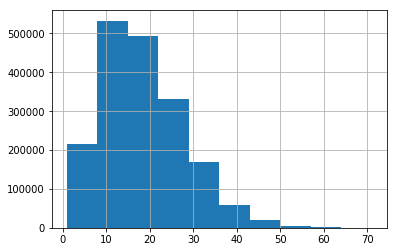

ts_range


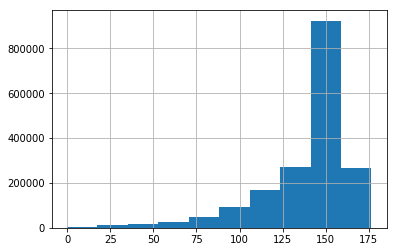

view_freq


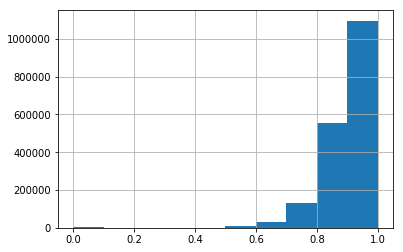

purch_freq


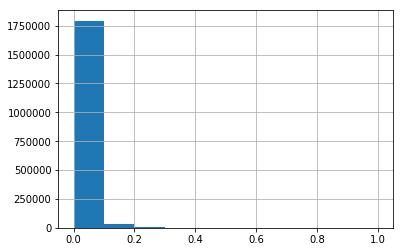

fav_freq


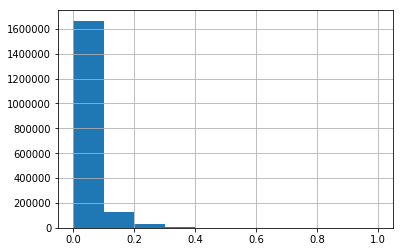

cart_freq


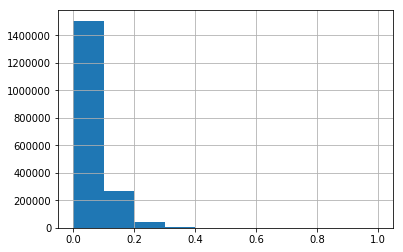

time_to_buy


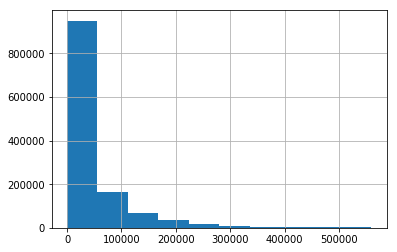

mean_purchase_diff_time


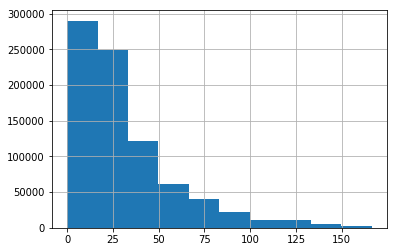

cid_count


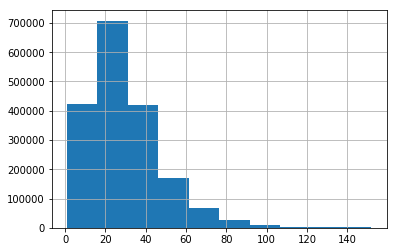

In [53]:
for c in train_dfs.loc[:, 'sessia_count':].columns:
    print(c)
    train_dfs[c].hist()
    plt.show()

In [136]:
# train_dfs.dropna(inplace = True)

In [31]:
# train_dfs['time_to_buy'].fillna(0, inplace = True)
# train_dfs['mean_purchase_diff_time'].fillna(train_dfs['mean_purchase_diff_time'].max(), inplace = True)

# Clustering

In [106]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [274]:
cluster_columns = ['time_to_buy', 'mean_purchase_diff_time']#, 'purch_freq', 'fav_freq', 'cart_freq']
# cluster_columns = ['sessia_count', 'ts_range'] #, 'cid_count']#, 'purch_freq', 'fav_freq', 'cart_freq']
# cluster_columns = ['time_to_buy', 'mean_purchase_diff_time', 'purch_freq', 'fav_freq', 'cart_freq', 'sessia_count', 'ts_range', 'cid_count']#, 'purch_freq', 'fav_freq', 'cart_freq']
# cluster_columns = ['purch_freq', 'fav_freq', 'cart_freq']#, 'purch_freq', 'fav_freq', 'cart_freq']

In [275]:
cluster_df = train_dfs[['uid'] + cluster_columns].drop_duplicates().copy()
cluster_df.reset_index(inplace = True, drop = True)
cluster_df.dropna(inplace = True)
to_drop = []
for c in cluster_columns:
    ttb3s = cluster_df[c].mean() + cluster_df[c].std() * 3
    to_drop.extend(cluster_df[cluster_df[c] > ttb3s].index.values)
    ttb3s = cluster_df[c].mean() - cluster_df[c].std() * 3
    to_drop.extend(cluster_df[cluster_df[c] < ttb3s].index.values)
cluster_df.drop(list(set(to_drop)), inplace = True)  
cluster_df.loc[:, cluster_columns] = MinMaxScaler().fit_transform(cluster_df[cluster_columns]) # StandardScaler

In [313]:
km = KMeans(5, n_jobs=24)
cluster_df['cluster'] = km.fit_predict(cluster_df[cluster_columns])

# km = DBSCAN(eps = 0.03, n_jobs=24)
# cluster_df['cluster'] = km.fit_predict(cluster_df[cluster_columns])

In [143]:
# silhouette_score(cluster_df[cluster_columns].values, cluster_df['cluster'].values)

In [314]:
pca = PCA(n_components=2)
cluster_df['pca1'] = pca.fit_transform(cluster_df[cluster_columns])[:, 0]
cluster_df['pca2'] = pca.fit_transform(cluster_df[cluster_columns])[:, 1]
# cluster_df['pca3'] = pca.fit_transform(cluster_df[cluster_columns])[:, 2]

In [278]:
cluster_columns

['time_to_buy', 'mean_purchase_diff_time']

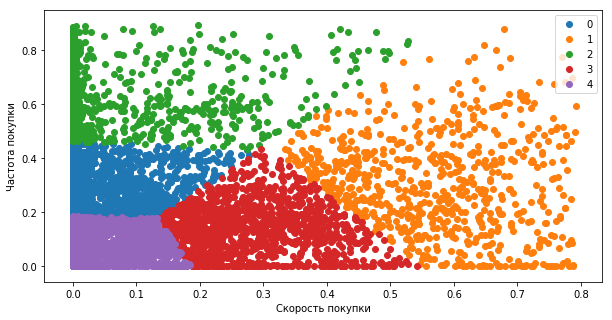

In [315]:
plt.figure(figsize=(10, 5))
plt.xlabel('Скорость покупки')
plt.ylabel('Частота покупки')
for cl, group in cluster_df.groupby('cluster'):
#     plt.scatter(group['pca1'], group['pca2'], label = cl)
    plt.scatter(group[cluster_columns[0]], group[cluster_columns[1]], label = cl)
plt.legend()

In [316]:
cluster_df.cluster.value_counts().values / cluster_df.shape[0]

array([0.34304207, 0.26375405, 0.17219525, 0.12432578, 0.09668285])

In [ ]:
cluster_df

# Test

In [47]:
for uid, group in tqdm.tqdm(test_dfs.groupby(['uid']), total = dfs.uid.nunique()):
    g_i = group.index
    test_dfs.loc[g_i, 'cid_count'] = group['cid'].nunique() # кол-во сессий
    test_dfs.loc[g_i, 'sessia_count'] = group['sessia'].nunique() # кол-во сессий
    test_dfs.loc[g_i, 'ts_range'] = (group['ts'].max() - group['ts'].min()) / 60 / 60 # сколько провел на сайте в часах
    test_dfs.loc[g_i, 'view_freq'] = group[group.action == 'view'].shape[0] / group.shape[0]
    test_dfs.loc[g_i, 'purch_freq'] = group[group.action == 'purchase'].shape[0] / group.shape[0] # сколько купил за все время в %
    test_dfs.loc[g_i, 'fav_freq'] = group[group.action == 'add-favs'].shape[0] / group.shape[0]
    test_dfs.loc[g_i, 'cart_freq'] = group[group.action == 'add-cart'].shape[0] / group.shape[0]

    # mean time to buy
    tb = []
    for i, row in group[group.action == 'purchase'].iterrows():
        tb.append(row['ts'] - group[group.iid == row['iid']].ts.values[0])
    test_dfs.loc[g_i, 'time_to_buy'] = np.mean(tb)

    # mean time between purchases
    i = group[group.action == 'purchase'].copy()
    i['shift_p_ts'] = i['ts'].shift()
    test_dfs.loc[g_i, 'mean_purchase_diff_time'] = i['ts'].diff().mean() / 60 / 60

  0%|          | 1/25000 [00:13<91:51:21, 13.23s/it]/opt/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning:

Mean of empty slice.

/opt/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning:

invalid value encountered in double_scalars

100%|██████████| 25000/25000 [11:54<00:00, 34.98it/s]


In [179]:
# test_dfs.dropna(inplace = True)

In [317]:
test_cluster_df = test_dfs[['uid'] + cluster_columns].drop_duplicates().copy()
test_cluster_df.dropna(inplace=True)
test_cluster_df.reset_index(inplace=True, drop = True)
to_drop = []
for c in cluster_columns:
    ttb3s = cluster_df[c].mean() + cluster_df[c].std() * 3
    to_drop.extend(cluster_df[cluster_df[c] > ttb3s].index.values)
    ttb3s = cluster_df[c].mean() - cluster_df[c].std() * 3
    to_drop.extend(cluster_df[cluster_df[c] < ttb3s].index.values)
cluster_df.drop(list(set(to_drop)), inplace = True)  
test_cluster_df.loc[:, cluster_columns] = StandardScaler().fit_transform(test_cluster_df[cluster_columns])

In [318]:
km = KMeans(5, n_jobs=24)
test_cluster_df['cluster'] = km.fit_predict(test_cluster_df[cluster_columns])

In [319]:
pca = PCA(n_components=2)
test_cluster_df['pca1'] = pca.fit_transform(test_cluster_df[cluster_columns])[:, 0]
test_cluster_df['pca2'] = pca.fit_transform(test_cluster_df[cluster_columns])[:, 1]
# cluster_df['pca3'] = pca.fit_transform(;cluster_df[cluster_columns])[:, 2]

In [320]:
cluster_columns

['time_to_buy', 'mean_purchase_diff_time']

In [321]:
km.cluster_centers_

array([[ 0.95535472, -0.25299222],
       [-0.43184496, -0.64327876],
       [-0.31183663,  2.59459876],
       [ 3.09718641,  0.40383557],
       [-0.44729744,  0.55874895]])

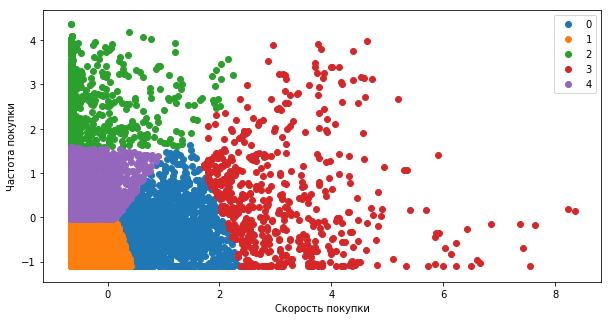

In [322]:
plt.figure(figsize=(10, 5))
plt.xlabel('Скорость покупки')
plt.ylabel('Частота покупки')
for cl, group in test_cluster_df.groupby('cluster'):
#     plt.scatter(group['pca1'], group['pca2'], label = cl)
    plt.scatter(group[cluster_columns[0]], group[cluster_columns[1]], label = cl)
plt.legend()

# Check cluster

In [324]:
def trans_cluster(x):
    if x == 0:
        return 4
    elif x == 1:
        return 3
    elif x == 2:
        return 2
    elif x == 3:
        return 1
    elif x == 4:
        return 1

# def trans_cluster(x):
#     if x == 0:
#         return 0
#     elif x == 1:
#         return 1
#     elif x == 2:
#         return 2

In [326]:
cluster_df.head(1)

uid  time_to_buy  mean_purchase_diff_time  cluster      pca1      pca2
3   68      0.29948                 0.213488        3  0.028779  0.166437

In [327]:
test_cluster_df.head(1)

uid  time_to_buy  mean_purchase_diff_time  cluster      pca1      pca2
0   68     0.004579                 0.108041        4  0.079634 -0.073159

In [328]:
comb_df = test_cluster_df.copy()

In [329]:
comb_df = comb_df.merge(cluster_df[['uid', 'cluster']].rename(columns = {'cluster':'old_cluster'}), on = ['uid'], how = 'left')

In [330]:
comb_df.dropna(inplace=True)

In [331]:
comb_df['old_cluster_mapped'] = comb_df['old_cluster'].map(lambda x: trans_cluster(x))

In [332]:
comb_df[comb_df['cluster'] == comb_df['old_cluster_mapped']].shape[0] / comb_df.shape[0]

0.5035225859925404

In [408]:
i= 0
for cl_i in range(5):
    for cl_j in range(5):
        s_i = comb_df[(comb_df['cluster'] == cl_i)&(comb_df['old_cluster_mapped'] == cl_j)].shape[0] / comb_df.shape[0]
        i += s_i
        print(cl_i, cl_j, s_i)

0 0 0.0
0 1 0.07542478242851222
0 2 0.005801906340654786
0 3 0.07197126674955104
0 4 0.014090343970161625
1 0 0.0
1 1 0.4008841000138141
1 2 0.004834921950545655
1 3 0.0017958281530598148
1 4 0.1556844868075701
2 0 0.0
2 1 0.0001381406271584473
2 2 0.0001381406271584473
2 3 0.0
2 4 0.0
3 0 0.0
3 1 0.0035916563061196296
3 2 0.0011051250172675784
3 3 0.002900953170327393
3 4 0.0008288437629506838
4 0 0.0
4 1 0.04779665699682276
4 2 0.10885481420085648
4 3 0.0045586406962287605
4 4 0.0995993921812405


In [409]:
i

1.0

In [333]:
comb_df.head()

uid  time_to_buy  mean_purchase_diff_time  cluster      pca1      pca2  \
0   68     0.004579                 0.108041        4  0.079634 -0.073159   
1   72    -0.644012                 0.934483        4  0.205394 -1.116165   
2  100    -0.380483                -0.847814        1 -0.868537  0.330453   
3  122    -0.339890                 1.127185        4  0.556701 -1.037379   
4  143    -0.502456                -0.389293        1 -0.630562 -0.080018   

   old_cluster  old_cluster_mapped  
0          3.0                   1  
1          2.0                   2  
2          4.0                   1  
3          2.0                   2  
4          0.0                   4

# Cluster describe

In [303]:
comb_df[comb_df['cluster'] != comb_df['old_cluster_mapped']].shape[0]

2063

In [304]:
comb_df[comb_df['cluster'] == comb_df['old_cluster_mapped']].shape[0]

5353

In [305]:
comb_df[(comb_df['old_cluster'] == 0)&(comb_df['cluster'] == 2)].shape[0]



143

In [231]:
comb_df[(comb_df['old_cluster'] == 0)&(comb_df['cluster'] == 0)].shape[0]

63

In [234]:
63 / 2066 * 100

3.049370764762827

In [236]:
995 / 2066 * 100

48.16069699903194

# Cluster hist of purchase

In [334]:
test_with_cluster_dfs = test_dfs.copy()

In [335]:
test_dfs.shape[0], test_cluster_df.shape[0]

(2499659, 10544)

In [336]:
test_cluster_df.head()

uid  time_to_buy  mean_purchase_diff_time  cluster      pca1      pca2
0   68     0.004579                 0.108041        4  0.079634 -0.073159
1   72    -0.644012                 0.934483        4  0.205394 -1.116165
2  100    -0.380483                -0.847814        1 -0.868537  0.330453
3  122    -0.339890                 1.127185        4  0.556701 -1.037379
4  143    -0.502456                -0.389293        1 -0.630562 -0.080018

In [337]:
test_with_cluster_dfs = test_dfs.merge(test_cluster_df[['uid', 'cluster']], on = 'uid', how = 'left')

In [310]:
df[df.action == 'purchase'].uid.nunique() / df.uid.nunique()

0.6730233769761669

In [243]:
test_with_cluster_dfs[test_with_cluster_dfs.action != 'purchase'].uid.nunique()

24995

In [244]:
test_with_cluster_dfs.uid.nunique()

25000

In [311]:
for cl, group in test_with_cluster_dfs.groupby(['cluster']):
    print(cl, group[group.action == 'purchase'].uid.nunique() / test_with_cluster_dfs[test_with_cluster_dfs.cluster == cl].uid.nunique())

0.0 1.0
1.0 1.0
2.0 1.0


In [390]:
group

uid      iid      cid    action          ts             ts_repr  \
285           68  4087713  2479420      view  1511586311 2017-11-25 05:05:11   
286           68  3166155    61626      view  1511600221 2017-11-25 08:57:01   
287           68   219127    61626  add-favs  1511600310 2017-11-25 08:58:30   
288           68  1933441  2479420      view  1511616495 2017-11-25 13:28:15   
289           68  2829119  3776866      view  1511616607 2017-11-25 13:30:07   
290           68  3970569  3253210      view  1511624031 2017-11-25 15:33:51   
291           68  1655757  3470850      view  1511624169 2017-11-25 15:36:09   
292           68   931488  2479420  add-favs  1511624977 2017-11-25 15:49:37   
293           68   625946  3607361  add-favs  1511645605 2017-11-25 21:33:25   
294           68  2942236  3607361      view  1511645784 2017-11-25 21:36:24   
295           68  2190113  2479420      view  1511645841 2017-11-25 21:37:21   
296           68  3570906  2479420  add-favs  1511646019 2017-11-25 21:40:19   
297           68  1001484  4756105      view  1511646257 2017-11-25 21:44:17   
298           68  4904775   393663      view  1511647021 2017-11-25 21:57:01   
299           68  2671601  3123784      view  1511647350 2017-11-25 22:02:30   
300           68  2697795  3776866  add-cart  1511706776 2017-11-26 14:32:56   
301           68  1182382  3776866      view  1511706803 2017-11-26 14:33:23   
302           68  2697795  3776866      view  1511706820 2017-11-26 14:33:40   
303           68  1182382  3776866      view  1511706822 2017-11-26 14:33:42   
304           68  2697795  3776866      view  1511706855 2017-11-26 14:34:15   
305           68  2091937  3776866      view  1511707076 2017-11-26 14:37:56   
306           68  2784400  3470850      view  1511708501 2017-11-26 15:01:41   
307           68   213748  2640118      view  1511754388 2017-11-27 03:46:28   
308           68  4601751  3381583      view  1511757997 2017-11-27 04:46:37   
309           68  3389814  2832009      view  1511758025 2017-11-27 04:47:05   
310           68   257883   767106      view  1511758234 2017-11-27 04:50:34   
311           68  1184689  3598912      view  1511758365 2017-11-27 04:52:45   
312           68  2698747  2832009      view  1511759022 2017-11-27 05:03:42   
313           68   641958  3598912      view  1511759034 2017-11-27 05:03:54   
314           68  2828808  4145813      view  1511759047 2017-11-27 05:04:07   
...          ...      ...      ...       ...         ...                 ...   
2499465  1017769  1343119  2735466      view  1512041627 2017-11-30 11:33:47   
2499466  1017769  2602095  1936748      view  1512041648 2017-11-30 11:34:08   
2499467  1017769  1125376  1936748      view  1512041736 2017-11-30 11:35:36   
2499468  1017769  2602095  1936748      view  1512041749 2017-11-30 11:35:49   
2499469  1017769  3795360  1936748      view  1512041789 2017-11-30 11:36:29   
2499470  1017769   222131  1025720      view  1512042025 2017-11-30 11:40:25   
2499471  1017769  2599485  1025720      view  1512042100 2017-11-30 11:41:40   
2499472  1017769  3795360  1936748      view  1512042206 2017-11-30 11:43:26   
2499473  1017769  2102755  4989387      view  1512042379 2017-11-30 11:46:19   
2499474  1017769  3255307  2869260      view  1512042554 2017-11-30 11:49:14   
2499475  1017769   250498   982926      view  1512042963 2017-11-30 11:56:03   
2499476  1017769  3795360  1936748      view  1512043001 2017-11-30 11:56:41   
2499477  1017769   250498   982926      view  1512043029 2017-11-30 11:57:09   
2499478  1017769  4060789  3264833      view  1512043046 2017-11-30 11:57:26   
2499479  1017769   250498   982926      view  1512043249 2017-11-30 12:00:49   
2499480  1017769  4060789  3264833      view  1512043271 2017-11-30 12:01:11   
2499481  1017769  2102755  4989387  purchase  1512043427 2017-11-30 12:03:47   
2499482  1017769  3119013  4138583      view  1512200939 2017-12-02 07:48:59   
2499483  1017

In [401]:
cluster_df.cluster.value_counts()

4    2544
0    1956
3    1277
2     874
1     588
Name: cluster, dtype: int64

In [398]:
cluster_df.cluster.value_counts().values / cluster_df.shape[0]

array([0.35142976, 0.27020307, 0.17640558, 0.12073491, 0.08122669])

In [404]:
for cl, group in test_with_cluster_dfs.groupby(['cluster']):
#     print(cl, group[group.action == 'purchase'].ts.nunique() / group[group.action == 'purchase'].uid.nunique())
    print(cl, group[group.action == 'purchase'].ts.count() / group[group.action == 'purchase'].ts.nunique())
#     break

0.0 1.0070461453440176
1.0 1.0191710610615543
2.0 1.0034458993797382
3.0 1.0006105006105006
4.0 1.0068853786958283


In [391]:
for cl, group in test_with_cluster_dfs.groupby(['cluster']):
    print(cl, group[group.action == 'purchase'].shape[0] / group[group.action == 'view'].shape[0] * 100, group[group.action == 'purchase'].shape[0] / group[group.action == 'purchase'].uid.nunique())
#     break

0.0 3.1473045618428723 4.044950055493896
1.0 3.960509810305369 4.266556632968847
2.0 2.371219647248506 2.0027510316368637
3.0 2.3126525659296466 2.895759717314488
4.0 2.9686772309860165 2.8662567255956954


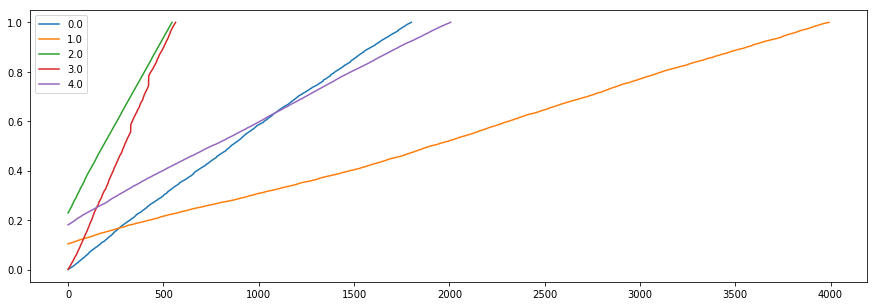

In [397]:
plt.figure(figsize=(15, 5))
for cl, group in test_with_cluster_dfs[test_with_cluster_dfs.action == 'purchase'].groupby(['cluster']):
#     y = 1 - group['time_to_buy'] / group['time_to_buy'].max()
    y = group['time_to_buy'].value_counts().reset_index().sort_values('index').time_to_buy.cumsum() / group['time_to_buy'].value_counts().reset_index().sort_values('index').time_to_buy.cumsum().max()
#     y = group.sort_values('time_to_buy')['time_to_buy'].cumsum() / group.sort_values('time_to_buy')['time_to_buy'].cumsum().max()
#     y = y[y != 0]
    plt.plot(sorted(y), label = cl)
    
plt.legend()

# Recommeded systems

In [399]:
# test_dfs[['uid', 'iid']].drop_duplicates()

In [377]:
# ratings = train_dfs[train_dfs.action == 'purchase'][['uid', 'cid']].drop_duplicates().copy()
ratings= train_dfs[train_dfs.action == 'purchase'].groupby(['uid', 'cid'], as_index = False).size().reset_index()
ratings['ones'] = ratings[0] # 1

In [378]:
ratings.head()

uid      cid  0  ones
0   11  3102419  1     1
1   68   643645  1     1
2   68  3776866  1     1
3   68  4242717  1     1
4   72  2640118  1     1

In [379]:
import scipy.sparse as sp
ratings['uid'] = ratings['uid'].astype('category')
ratings['cid'] = ratings['cid'].astype('category')

ratings_matrix = sp.coo_matrix(
    (ratings['ones'].astype(np.float32),
        (
            ratings['cid'].cat.codes.copy(),
            ratings['uid'].cat.codes.copy()
        )
    )
)

ratings_matrix = ratings_matrix.tocsr()

In [380]:
from implicit.nearest_neighbours import TFIDFRecommender, BM25Recommender

model = TFIDFRecommender()
model.fit(ratings_matrix)

100%|██████████| 2979/2979 [00:00<00:00, 48313.66it/s]


In [381]:
ratings_matrix_T = ratings_matrix.T.tocsr()

In [382]:
user_uid_to_cat = dict(zip(
    ratings['uid'].cat.categories,
    range(len(ratings['uid'].cat.categories))
))

In [383]:
element_uid_to_cat = dict(zip(
    ratings['cid'].cat.categories,
    range(len(ratings['cid'].cat.categories))
))

In [384]:
# test_dfs[['uid', 'iid']].drop_duplicates()

In [385]:
result = {}

for user_uid in tqdm.tqdm(test_dfs.uid.unique(), total = test_dfs.uid.nunique()):
    try:
        user_cat = user_uid_to_cat[user_uid]
    except LookupError:
        continue
    
    recs = model.recommend(
        user_cat,
        ratings_matrix_T,
        N=20
    )
    
    result[user_uid] = [int(ratings['cid'].cat.categories[i]) for i, _ in recs]

100%|██████████| 25000/25000 [00:02<00:00, 11617.36it/s]


**acc**

In [386]:
acc_df = test_dfs[test_dfs.action == 'purchase'][['uid', 'cid']]

In [387]:
comb_df[comb_df.cluster == comb_df.old_cluster_mapped].uid.unique()

array([    100,     515,     571, ..., 1016393, 1017197, 1017769])

In [388]:
def print_error(name, df):
    vs = []
    for user_uid, group in acc_df[acc_df.uid.isin(comb_df[comb_df.cluster == comb_df.old_cluster_mapped].uid.unique())].groupby(['uid']):
        if group.shape[0] > 0:
            n = group.shape[0]
            pre_vals = df.get(user_uid)
            if pre_vals is not None:
                rel_el = np.intersect1d(pre_vals, group.cid.values)
                v = len(rel_el) / min(20, n)
            else:
                pass
#                 vs.append(0)
            vs.append(v)
    print(name, np.mean(vs))
    
print_error('1', result)

1 0.07072050111144762


In [389]:
def print_error(name, df):
    vs = []
    for user_uid, group in acc_df[acc_df.uid.isin(comb_df[(comb_df.old_cluster_mapped == 1) & (comb_df.cluster.isin([0, 2]))].uid.unique())].groupby(['uid']):
        if group.shape[0] > 0:
            n = group.shape[0]
            pre_vals = df.get(user_uid)
            if pre_vals is not None:
                rel_el = np.intersect1d(pre_vals, group.cid.values)
                v = len(rel_el) / min(20, n)
            else:
                pass
#                 vs.append(0)
            vs.append(v)
    print(name, np.mean(vs))
    
print_error('1', result)

1 0.06240763603652086


In [233]:
df.head()

uid      iid      cid action          ts             ts_repr      ts_shift  \
1    1  2333346  2520771   view  1511561733 2017-11-24 22:15:33  1.511544e+09   
2    1  2576651   149192   view  1511572885 2017-11-25 01:21:25  1.511562e+09   
3    1  3830808  4181361   view  1511593493 2017-11-25 07:04:53  1.511573e+09   
4    1  4365585  2520377   view  1511596146 2017-11-25 07:49:06  1.511593e+09   
5    1  4606018  2735466   view  1511616481 2017-11-25 13:28:01  1.511596e+09   

     ts_dif  same_sess  sessia  
1  4.906389          1       2  
2  3.097778          1       3  
3  5.724444          1       4  
4  0.736944          1       5  
5  5.648611          1       6

In [234]:
df.shape

(98668221, 10)

In [252]:
import random

def some(x, n):
    return x.iloc[random.sample(list(x.index), n)]

a = df.copy()
a.reset_index(inplace = True, drop = True)
a = some(a, 200000)
a = pd.get_dummies(a)
a['c'] = np.arange(0, a.shape[0],1)

# a = df.copy()
# a['c'] = np.arange(0, df.shape[0],1)

b = a.groupby('cid').agg({'iid':'nunique', 
                      'action_add-cart':'sum', 
                      'action_add-favs':'sum', 
                      'action_purchase':'sum',
                      'action_view'    :'sum',
                      'c':'sum',
                      'ts':lambda x    : x.max() - x.min()})

b['freq_c'] = b['ts'] / b['c']
b['freq_action_add-cart'] = b['action_add-cart'] / b['c']
b['freq_action_add-favs'] = b['action_add-favs'] / b['c']
b['freq_action_purchase'] = b['action_purchase'] / b['c']
b['freq_action_view'] =     b['action_view']     / b['c']

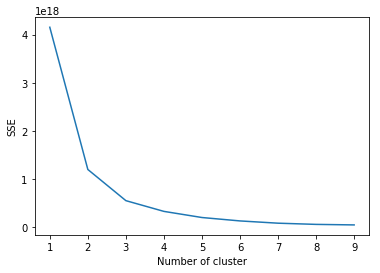

In [253]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(b)
    b["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

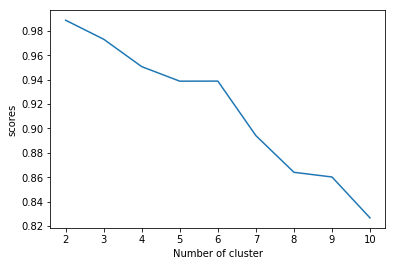

In [254]:
scores = {}
for n_clusters in np.arange(2,11,1):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(b)
    score = silhouette_score(b, preds, metric='euclidean')
    scores[n_clusters] = score

plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("scores")
plt.show()

In [255]:
m = KMeans(n_clusters=  3 , max_iter=2000).fit(b)
b['clusters'] = m.fit_predict(b)

In [256]:
c = list(b.columns)
c.remove('clusters')
b.groupby('clusters')[c].agg('mean').reset_index()

clusters  action_add-cart             c  action_add-favs  action_purchase  \
0         0         1.381093  2.259172e+06         0.643596         0.567841   
1         1       278.571429  6.345718e+08       177.571429        40.285714   
2         2        94.035714  1.732743e+08        50.500000        22.714286   

              ts          iid  action_view    freq_c  freq_action_add-cart  \
0  419638.016670    18.173665    20.009496  0.740251          1.074645e-06   
1  781076.428571  3714.000000  5850.571429  0.001316          4.514256e-07   
2  779935.392857  1201.928571  1563.464286  0.005236          5.389757e-07   

   freq_action_add-favs  freq_action_purchase  freq_action_view  
0          5.705699e-07          7.217568e-07          0.000016  
1          2.797960e-07          6.651914e-08          0.000009  
2          2.866121e-07          1.362595e-07          0.000009